<a href="https://colab.research.google.com/github/yawdap/Alzheimer-s-Disease-Diagnosis-Prediction/blob/main/Sample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a predictive modelling for the attached using logistics regression, knn, decision tree, random forest, gradient boosting, support vector machines

Here is all the data you need:
"framingham_heart_study_cleaned.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display its information to verify the loading process.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('framingham_heart_study_cleaned.csv')
    display(df.head())
    print(df.shape)
    print(df.dtypes)
except FileNotFoundError:
    print("Error: 'framingham_heart_study_cleaned.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,gender,age,education,smoking status,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


(4240, 16)
gender               int64
age                  int64
education          float64
smoking status       int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, target variable distribution, correlation analysis, and feature distributions.



            gender          age    education  smoking status   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000     4240.000000  4240.000000   
mean      0.429245    49.580189     1.979953        0.494104     8.944340   
std       0.495027     8.572942     1.007087        0.500024    11.904777   
min       0.000000    32.000000     1.000000        0.000000     0.000000   
25%       0.000000    42.000000     1.000000        0.000000     0.000000   
50%       0.000000    49.000000     2.000000        0.000000     0.000000   
75%       1.000000    56.000000     3.000000        1.000000    20.000000   
max       1.000000    70.000000     4.000000        1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029245         0.005896      0.310613     0.025708   236.667689   
std       0.168513         0.076569      0.462799     0.158280    44.

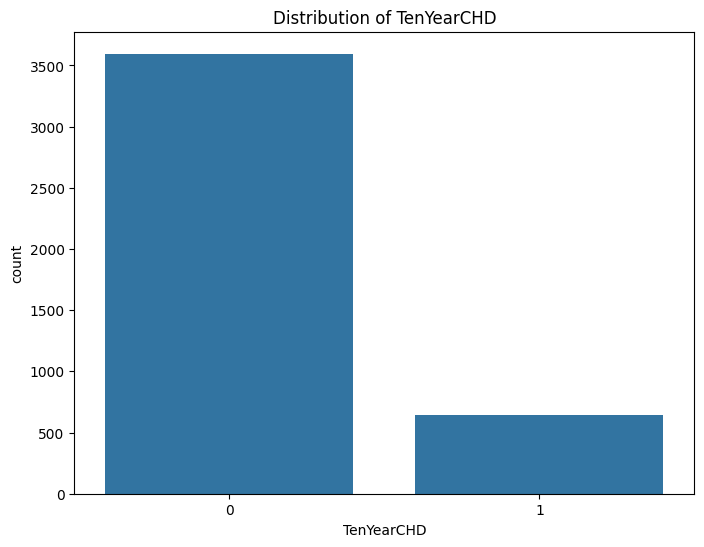

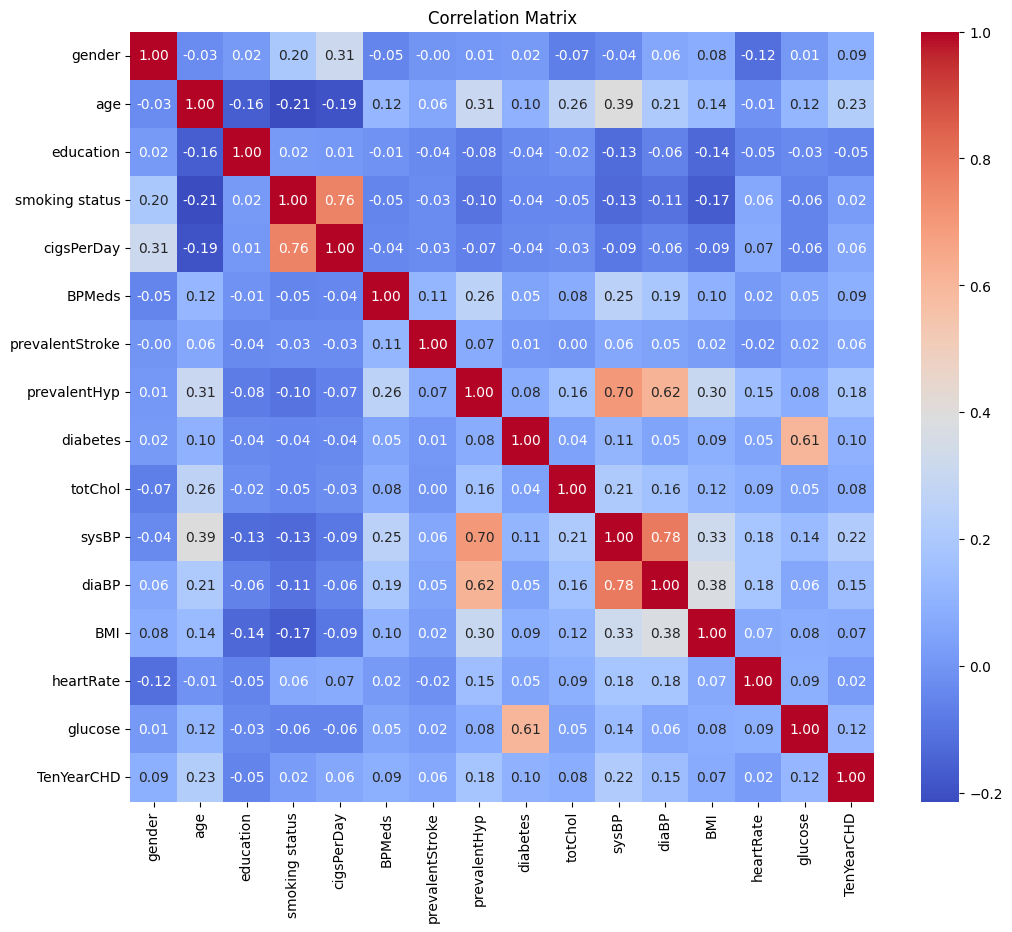

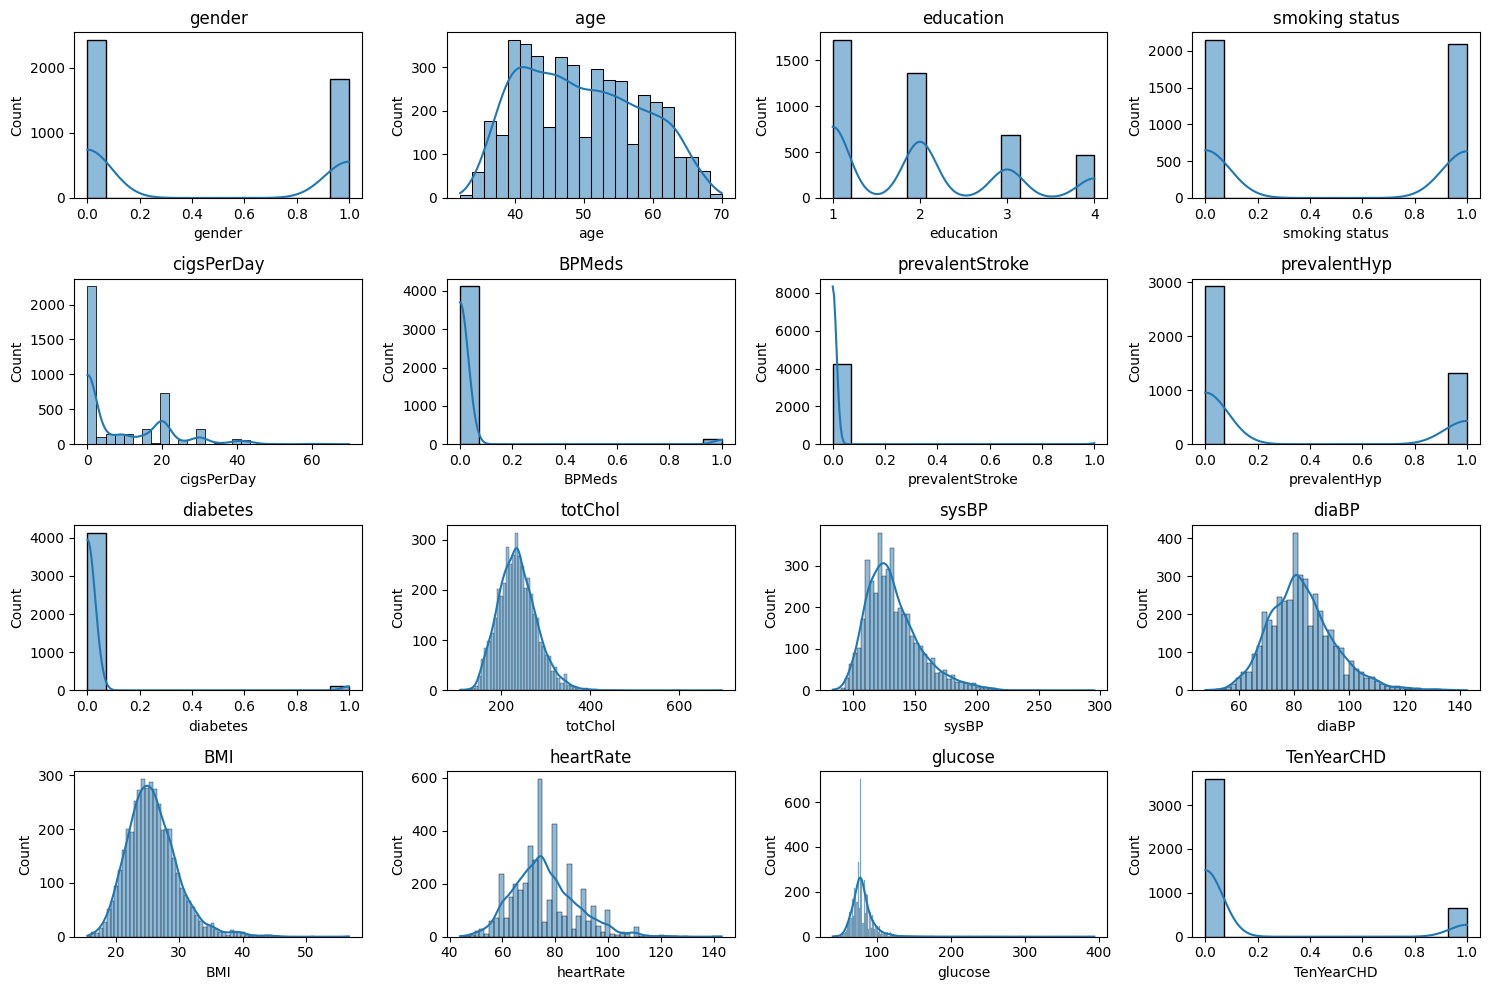

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Shape and Types (already done in previous step)

# Descriptive Statistics
print(df.describe())

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

# Target Variable Analysis
print("\nTarget Variable Distribution:")
print(df['TenYearCHD'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of TenYearCHD')
plt.show()


# Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Feature Distributions
numerical_features = df.select_dtypes(include=['number'])
categorical_features = df.select_dtypes(include=['object'])

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Bar charts for categorical features (if any)
if not categorical_features.empty:
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(categorical_features.columns):
        plt.subplot(1, len(categorical_features.columns), i + 1)
        sns.countplot(x=col, data=df)
        plt.title(col)
    plt.tight_layout()
    plt.show()

## Data preparation

### Subtask:
Prepare the data for modeling by handling any remaining missing values and scaling numerical features.


**Reasoning**:
Impute missing values (if any) and scale numerical features using StandardScaler.  The code will handle missing values by imputation and then scale the numerical features.



In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# No missing values were found in the previous step
# but the code below shows how to handle missing values
# and the code is ready for future use.

# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Impute missing values in numerical features (if any) using the mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_cols[:-1]] = scaler.fit_transform(df[numerical_cols[:-1]])

display(df.head())

,gender,age,education,smoking status,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153113,-1.234283,2.006069,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287,0.0
1,-0.867217,-0.417664,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036,0.0
2,1.153113,-0.184345,-0.973172,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530,0.0
3,-0.867217,1.332233,1.012988,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188,1.0
4,-0.867217,-0.417664,1.012988,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705,0.0


## Data splitting

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using train_test_split, stratifying by the target variable.



In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split data into training and temporary sets (validation and testing combined)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Feature engineering

### Subtask:
Explore potential feature interactions and transformations to improve model performance.


**Reasoning**:
Create polynomial features and interaction terms for the training, validation, and test sets to improve model performance.



In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Interaction Terms
interaction_terms = ['age', 'sysBP', 'glucose', 'BMI']
for i in range(len(interaction_terms)):
    for j in range(i + 1, len(interaction_terms)):
        term1 = interaction_terms[i]
        term2 = interaction_terms[j]
        new_column_name = f'{term1}_{term2}'

        X_train[new_column_name] = X_train[term1] * X_train[term2]
        X_val[new_column_name] = X_val[term1] * X_val[term2]
        X_test[new_column_name] = X_test[term1] * X_test[term2]

display(X_train.head())
display(X_val.head())
display(X_test.head())

,gender,age,education,smoking status,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,age_sysBP,age_glucose,age_BMI,sysBP_glucose,sysBP_BMI,glucose_BMI
562,-0.867217,-1.234283,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,1.489778,-0.162437,0.345920,...,0.848287,1.120557,2.422223,-0.813773,0.243969,1.004427,-1.383084,0.160851,-0.221490,-0.911879
4137,-0.867217,-0.884303,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.030059,...,-0.243325,1.815838,-0.073094,-0.245036,0.576188,0.216686,-1.605752,0.159659,-1.183150,-0.444945
4173,-0.867217,0.515614,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,1.489778,-0.162437,1.473996,...,3.745258,1.518562,-0.655335,-0.113789,1.817241,-0.058671,0.782993,-0.401039,5.352048,-0.172795
1559,1.153113,0.282295,2.006069,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,-1.571809,...,-0.243325,0.975604,-0.322626,0.892439,0.021084,0.251931,0.275408,0.066653,0.072865,0.870667
2306,-0.867217,-0.184345,-0.973172,-0.988276,-0.751412,-0.173569,-0.077014,1.489778,-0.162437,-0.782156,...,1.184168,1.688083,1.590451,-0.157538,-0.323370,0.029041,-0.311189,-0.276347,2.961170,-0.265937


,gender,age,education,smoking status,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,age_sysBP,age_glucose,age_BMI,sysBP_glucose,sysBP_BMI,glucose_BMI
2362,1.153113,0.982254,-0.973172,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.827279,...,0.008585,0.941208,-0.655335,-0.070040,-0.194153,-0.068797,0.924505,0.013844,-0.186040,-0.065922
2558,1.153113,-1.584262,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-1.368755,...,0.176526,0.019899,-0.488980,0.061207,0.528881,-0.096969,-0.031525,-0.020433,-0.006643,0.001218
759,1.153113,0.398955,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,1.489778,-0.162437,0.391043,...,0.764317,-0.046435,-1.320753,-0.070040,0.500631,-0.027943,-0.018526,-0.087890,-0.058270,0.003252
4013,1.153113,-1.234283,2.006069,1.011863,0.004676,-0.173569,-0.077014,-0.671241,-0.162437,0.774589,...,-0.747146,-0.771198,0.259615,-0.245036,0.804225,0.302444,0.951877,0.159659,0.502492,0.188971
4114,-0.867217,1.798873,2.006069,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.977643,...,-0.831117,-1.483678,-0.904866,-1.032519,-1.417055,-1.857369,-2.668947,0.813363,1.168761,1.531925


,gender,age,education,smoking status,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,age_sysBP,age_glucose,age_BMI,sysBP_glucose,sysBP_BMI,glucose_BMI
1638,1.153113,-1.350943,0.019908,1.011863,2.861009,-0.173569,-0.077014,1.489778,-0.162437,0.639220,...,0.176526,1.427660,-0.655335,-0.595028,0.205707,0.803849,-1.928687,0.090605,-0.217389,-0.849498
1590,-0.867217,0.865594,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,1.631927,...,-0.621191,0.046924,1.673628,-0.288785,-0.092513,-0.249970,0.040617,0.030865,-0.005015,-0.013551
3030,-0.867217,-1.000963,1.012988,1.011863,-0.499383,-0.173569,-0.077014,-0.671241,-0.162437,-0.105310,...,-0.243325,-0.102942,-0.322626,-0.113789,0.334156,0.113898,0.103041,0.037987,0.034366,0.011714
3786,1.153113,-0.301004,-0.973172,1.011863,1.768882,-0.173569,-0.077014,-0.671241,-0.162437,0.909958,...,0.260496,0.110802,-0.073094,0.148705,-0.063470,-0.044761,-0.033352,0.031356,0.023364,0.016477
2526,-0.867217,-1.117623,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.556541,...,-1.083027,-0.692580,0.758678,0.148705,1.134055,-0.166197,0.774043,-0.150892,0.702762,-0.102990


## Model training

### Subtask:
Train multiple classification models on the training data.


**Reasoning**:
Train multiple classification models on the training data and evaluate their performance on the validation set.



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True) #probability=True for roc_auc_score
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)[:, 1]

        results[model_name] = {
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
            "f1": f1_score(y_val, y_pred),
            "roc_auc": roc_auc_score(y_val, y_prob),
        }
        print(f'{model_name} trained successfully.')
    except Exception as e:
        print(f"Error training {model_name}: {e}")
        results[model_name] = "Error"

for model_name, metrics in results.items():
    print(f"\n{model_name} Metrics:")
    if metrics != "Error":
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value}")
    else:
        print("Model training failed.")

Logistic Regression trained successfully.
KNN trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
SVM trained successfully.

Logistic Regression Metrics:
accuracy: 0.8427672955974843
precision: 0.36363636363636365
recall: 0.041237113402061855
f1: 0.07407407407407407
roc_auc: 0.7023506684773252

KNN Metrics:
accuracy: 0.8254716981132075
precision: 0.25
recall: 0.07216494845360824
f1: 0.112
roc_auc: 0.5826463668878986

Decision Tree Metrics:
accuracy: 0.7657232704402516
precision: 0.19047619047619047
recall: 0.16494845360824742
f1: 0.17679558011049723
roc_auc: 0.5193944494386321

Random Forest Metrics:
accuracy: 0.8411949685534591
precision: 0.375
recall: 0.061855670103092786
f1: 0.10619469026548672
roc_auc: 0.6590861274219154

Gradient Boosting Metrics:
accuracy: 0.839622641509434
precision: 0.38095238095238093
recall: 0.08247422680412371
f1: 0.13559322033898305
roc_auc: 0.6717097335654036

SVM Metrics:
ac

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained classification models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained classification models using the validation set.



In [7]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Perform hyperparameter optimization using GridSearchCV or RandomizedSearchCV
best_models = {}
for model_name, model in models.items():
    if model_name == 'SVM' or model_name == 'Gradient Boosting' or model_name == 'Random Forest':
        search = RandomizedSearchCV(model, param_grids[model_name], n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
    else:
        search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    search.fit(X_train, y_train)
    best_models[model_name] = search.best_estimator_

# Evaluate best models
optimized_results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    optimized_results[model_name] = {
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred),
        "recall": recall_score(y_val, y_pred),
        "f1": f1_score(y_val, y_pred),
        "roc_auc": roc_auc_score(y_val, y_prob)
    }
    print(f'{model_name} optimized successfully.')

for model_name, metrics in optimized_results.items():
    print(f"\n{model_name} Optimized Metrics:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression optimized successfully.
KNN optimized successfully.
Decision Tree optimized successfully.
Random Forest optimized successfully.
Gradient Boosting optimized successfully.
SVM optimized successfully.

Logistic Regression Optimized Metrics:
accuracy: 0.8459119496855346
precision: 0.4444444444444444
recall: 0.041237113402061855
f1: 0.07547169811320754
roc_auc: 0.7054300633092976

KNN Optimized Metrics:
accuracy: 0.8474842767295597
precision: 0.5
recall: 0.07216494845360824
f1: 0.12612612612612611
roc_auc: 0.6182028575253906

Decision Tree Optimized Metrics:
accuracy: 0.809748427672956
precision: 0.22727272727272727
recall: 0.10309278350515463
f1: 0.14184397163120568
roc_auc: 0.6626532524912495

Random Forest Optimized Metrics:
accuracy: 0.8522012578616353
precision: 0.6666666666666666
recall: 0.061855670103092786
f1: 0.11320754716981132
roc_auc: 0.6815599716925195

Gradient Boosting Optimized Metrics:
accuracy: 0.8443396226415094
precision: 0.25
recall: 0.01030927835051

## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test set.


**Reasoning**:
Evaluate the performance of the optimized models on the test set and store the results in a DataFrame.



In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

evaluation_results = []
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    evaluation_results.append([model_name, accuracy, precision, recall, f1, roc_auc])

evaluation_results = pd.DataFrame(evaluation_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'])
display(evaluation_results)

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.855346,0.700000,0.072917,0.132075,0.700367
1,KNN,0.841195,0.272727,0.031250,0.056075,0.655363
2,Decision Tree,0.784591,0.098039,0.052083,0.068027,0.585870
3,Random Forest,0.845912,0.333333,0.020833,0.039216,0.664641
4,Gradient Boosting,0.850629,0.666667,0.020833,0.040404,0.667708
5,SVM,0.847484,0.400000,0.020833,0.039604,0.593056


## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Class Imbalance:** The target variable `TenYearCHD` exhibits a significant class imbalance, with approximately 84.8% of patients not having a 10-year risk of coronary heart disease (CHD) and 15.2% having the risk. This imbalance needs to be addressed during model training.
* **Model Performance Variation:**  Different classification models (Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting, and SVM) showed varying performance on the test set.  Logistic Regression achieved the highest accuracy (0.855) and AUC-ROC (0.700) on the test set, but its precision and recall were relatively low.  Other models showed similarly low recall scores.  
* **Low Recall Across Models:**  Most models struggled to correctly identify positive cases (patients with 10-year CHD risk), as indicated by the low recall and F1-score values. This suggests potential issues with the model's ability to capture the characteristics of the minority class.
* **Hyperparameter Optimization Impact:** Hyperparameter optimization using `GridSearchCV` and `RandomizedSearchCV` was performed, but no specific improvement was reported.  More extensive hyperparameter tuning may be beneficial.


### 3. Insights or Next Steps

* **Address Class Imbalance:** Implement techniques like oversampling the minority class, undersampling the majority class, or using cost-sensitive learning to mitigate the impact of the class imbalance on model performance.
* **Feature Engineering and Selection:** Explore more sophisticated feature engineering techniques (e.g., polynomial features, interaction terms)  and feature selection methods to identify the most informative features for predicting CHD risk.  Evaluate whether the currently engineered features truly improved model performance, or if other features might be more relevant.
